In [43]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import os
import pandas as pd
from datetime import datetime

In [2]:
def find_model(start, filename):
    for root, dirs, files in os.walk(start):
        if filename in files:
            return os.path.join(root, filename)

In [11]:
start_dir = 'ChemE 546/Project'
file_model = 'multi_enzyme_model.txt'
file_path = find_model(start_dir, file_model)

In [4]:
print(file_path)

None


In [12]:
'''
# Load file and convert to SBML (if not already)
def load_model(filename, filetype): 
    """ Input the filename/path of the file, and its syntax.
    Output declares whether file was successfully loaded or not"""
    
    model_ant = "multi_enzyme_model.txt"
    with open(model_ant, "r") as file:
        model_content = file.read()

    try:
        model_sbml = te.antimonyToSBML(model_content)
        model_load = te.loadSBMLModel(model_sbml)
        print("Successfully loaded file.")
    except Exception as e:
        print("Could not load file.", e)
'''

'\n# Load file and convert to SBML (if not already)\ndef load_model(filename, filetype): \n    """ Input the filename/path of the file, and its syntax.\n    Output declares whether file was successfully loaded or not"""\n    \n    model_ant = "multi_enzyme_model.txt"\n    with open(model_ant, "r") as file:\n        model_content = file.read()\n\n    try:\n        model_sbml = te.antimonyToSBML(model_content)\n        model_load = te.loadSBMLModel(model_sbml)\n        print("Successfully loaded file.")\n    except Exception as e:\n        print("Could not load file.", e)\n'

In [13]:
# Load file and convert to SBML
# If file is in SBML, function will still load the model

def load_model(filename, filetype): 
    """ 
    filename: .txt, .csv, biomodels website
    filetype: ant, sbml
    
    Input the filename/path of the file, and its syntax.
    Output declares whether file was successfully loaded or not
    """
    model_ant = filename
    with open(model_ant, "r") as file:
        model_content = file.read()
    if filetype=='antimony':
        try:
            model_sbml = te.antimonyToSBML(model_content)
            model_load = te.loadSBMLModel(model_sbml)
            print(f"Successfully converted file '{filename}' from {filetype} to SBML and loaded.")
        except Exception as e:
            print("Could not load file.", e)
    else: 
        try:
            model_load = te.loadSBMLModel(model_content)
            print(f"Successfully loaded SBML file {filename}.")
        except Exception as e:
            print("Could not load SBML file.", e)
    return model_load

In [14]:
model_load = load_model('multi_enzyme_model.txt', 'antimony')

Successfully converted file 'multi_enzyme_model.txt' from antimony to SBML and loaded.


In [27]:
def simulate_model(model):
    r = te.loadSBMLModel(model)
    result = r.simulate(0, 50, 101) 
    r.plot()
    return result

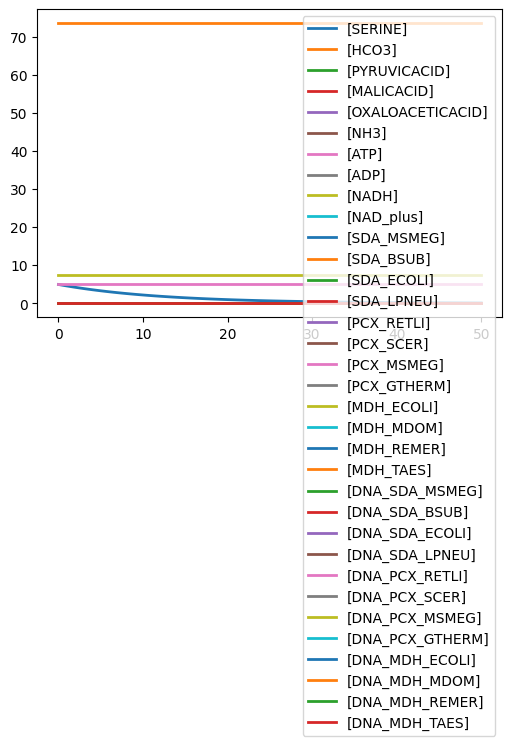

In [9]:
result = simulate_model(model_load)

In [44]:
# Extract time and species data
time = result[:, 0]
species_data = result[:, 1:]

r = te.loadSBMLModel(model_load)
species_names = r.getFloatingSpeciesIds()

# Convert to DataFrame
columns = ['Time'] + [str(i) for i in species_names]
df = pd.DataFrame(data=result, columns=columns)

# Grab current time and date, make variable to display date
now = datetime.now()
current_time = now.strftime("%Y%m%d_%H.%M.%S")

# Save DataFrame to .csv
df.to_csv(current_time + 'simulation_data.csv', index=False)

The goal is to output data into an excel format and dataframe in order to use different plotting packages, like Escher and matplotlib. Also will enable a more robust way to edit concentrations of metabolites and enzymes, and hopefully better automate plotting the changes.


In [36]:
df

,Time,SERINE,HCO3,PYRUVICACID,MALICACID,OXALOACETICACID,NH3,ATP,ADP,NADH,...,DNA_SDA_ECOLI,DNA_SDA_LPNEU,DNA_PCX_RETLI,DNA_PCX_SCER,DNA_PCX_MSMEG,DNA_PCX_GTHERM,DNA_MDH_ECOLI,DNA_MDH_MDOM,DNA_MDH_REMER,DNA_MDH_TAES
0,0.0,4.930950,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,4.732897,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,4.542742,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.5,4.360213,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,4.185040,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,48.0,0.096317,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,48.5,0.092449,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,49.0,0.088735,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,49.5,0.085171,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Plotting